In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import twitter_samples as ts

In [4]:
samples_tw = ts.strings('tweets.20150430-223406.json')

In [5]:
samples_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [6]:
from nltk.tokenize import word_tokenize as wtoken

In [7]:
wtoken(samples_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti-Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'wo',
 "n't",
 'give',
 'a',
 'toss',
 '!']

In [8]:
from nltk import regexp_tokenize

In [9]:
patn = '\w+'

In [10]:
regexp_tokenize(samples_tw[20], patn)

['B0MBSKARE',
 'the',
 'anti',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss']

In [11]:
patn = '\w+[!, \-,]'

In [12]:
regexp_tokenize(samples_tw[20], patn)

['B0MBSKARE ',
 'the ',
 'anti-',
 'Scottish ',
 'feeling ',
 'is ',
 'largely ',
 'a ',
 'product ',
 'of ',
 'Tory ',
 'press ',
 'In ',
 'practice ',
 'most ',
 'people ',
 't ',
 'give ',
 'a ',
 'toss!']

In [13]:
import nltk

In [14]:
from nltk.stem import PorterStemmer 

In [15]:
stemming = PorterStemmer()

In [16]:
stemming.stem("enjoys")

'enjoy'

In [17]:
stemming.stem("enjoys")

'enjoy'

In [18]:
stemming.stem("enjoyable")

'enjoy'

In [19]:
stemming.stem("variation")

'variat'

In [20]:
stemming.stem("variate")

'variat'

In [21]:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$", min=4)

In [22]:
regexp_stemmer.stem("flyable")

'fly'

In [23]:
regexp_stemmer.stem("flying")

'fly'

In [24]:
from nltk.corpus import stopwords

In [25]:
sw_l = stopwords.words('english')

In [26]:
sw_l[20:40]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this']

In [28]:
example_text = "This is an example sentence to test stopwords"

In [32]:
example_text_without_stopwords = [word for word in example_text.split() if word not in sw_l]

In [33]:
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [36]:
from nltk.corpus import gutenberg

In [38]:
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')

In [40]:
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

In [42]:
(len(words_in_hamlet_without_sw)/len(words_in_hamlet)) * 100

69.26124197002142

In [43]:
from nltk.corpus import webtext

In [44]:
webtext_sentences = webtext.sents('firefox.txt')

In [45]:
webtext_words = webtext.words('firefox.txt')

In [46]:
len(webtext_sentences)

1142

In [47]:
len(webtext_words)

102457

In [48]:
vocabulary = set(webtext_words)

In [49]:
len(vocabulary)

8296

In [62]:
frequency_dist = nltk.FreqDist(webtext_words)

In [56]:
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

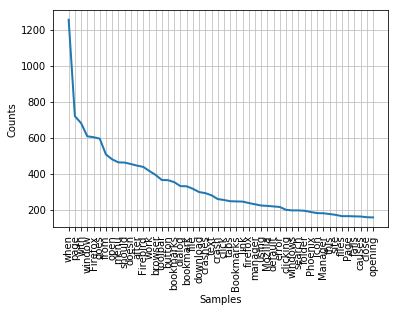

In [67]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k) > 3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50, cumulative=False)

In [68]:
frequency_dist

FreqDist({'when': 1255, 'page': 719, 'with': 680, 'window': 607, 'Firefox': 602, 'does': 594, 'from': 506, 'open': 479, 'menu': 462, 'should': 461, ...})

In [70]:
from wordcloud import WordCloud

In [71]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

In [72]:
import matplotlib.pyplot as plt

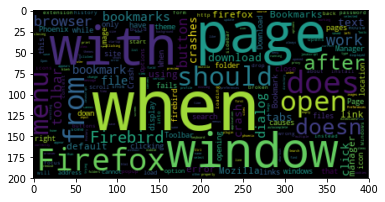

In [74]:
plt.imshow(wcloud, interpolation='bilinear')

In [77]:
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]

In [78]:
'when' in words_in_webtext_without_sw

False

In [79]:
'from' in words_in_webtext_without_sw

False

In [80]:
frequency_dist = nltk.FreqDist(words_in_webtext_without_sw)

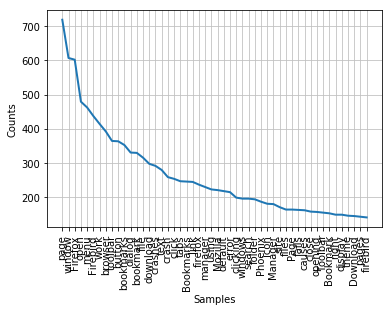

In [81]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k) > 3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50, cumulative=False)

In [82]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

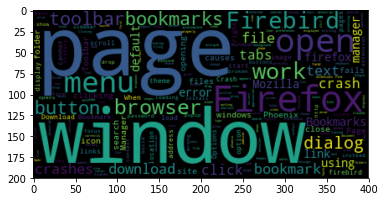

In [83]:
plt.imshow(wcloud, interpolation='bilinear')

In [84]:
from nltk.corpus import brown

In [85]:
brown.tagged_words()[30:40]

[('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD')]

In [86]:
import nltk

In [95]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tehmeer Ali
[nltk_data]     Paryani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [96]:
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")


In [97]:
nltk.pos_tag(text1, tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [98]:
example_sent = nltk.word_tokenize("The Company is located in North America")

In [99]:
example_sent

['The', 'Company', 'is', 'located', 'in', 'North', 'America']

In [100]:
tagged_sent = nltk.pos_tag(example_sent)

In [108]:
tagged_sent

[('The', 'DT'),
 ('Company', 'NNP'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('North', 'NNP'),
 ('America', 'NNP')]

In [110]:
print(nltk.ne_chunk(tagged_sent))

(S
  The/DT
  (ORGANIZATION Company/NNP)
  is/VBZ
  located/VBN
  in/IN
  (GPE North/NNP America/NNP))


In [113]:
%xmode verbose

Exception reporting mode: Verbose
